# BLACK FRIDAY PREDICTION
PROJECT
Problem Statement A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
• Data • Variable Definition • User_ID User ID • Product_ID Product ID • Gender Sex of User • Age Age in bins • Occupation Occupation (Masked) • City_Category Category of the City (A,B,C) • Stay_In_Current_City_Years Number of years stay in current city • Marital_Status Marital Status • Product_Category_1 Product Category (Masked) • Product_Category_2 Product may belongs to other category also (Masked) • Product_Category_3 Product may belongs to other category also (Masked) • Purchase Purchase Amount (Target Variable) Steps to

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,mean_squared_error
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Desktop/blackFriday_train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Finding the shape of train dataset
df.shape

(550068, 12)

In [5]:
#It has 12 columns & 550068 rows.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
#Age column is in object datatype which should in integer also same for the age group, years in city.

In [9]:
df.duplicated().sum()

0

In [10]:
#No duplicate values are seen in dataset

In [11]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
#Null vaues are present in procduct category 2 & 3.
#Except those no null values are present in dataset

In [3]:
#Let us fill the null values with mode method

df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])
df["Product_Category_3"]=df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [31]:
#Let us find if any null values are present in dataset
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [32]:
#No null values are after filling nulls with mode

In [33]:
#Finding the unique values
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.260768,14.989567,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.294093,2.739846,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# EDA

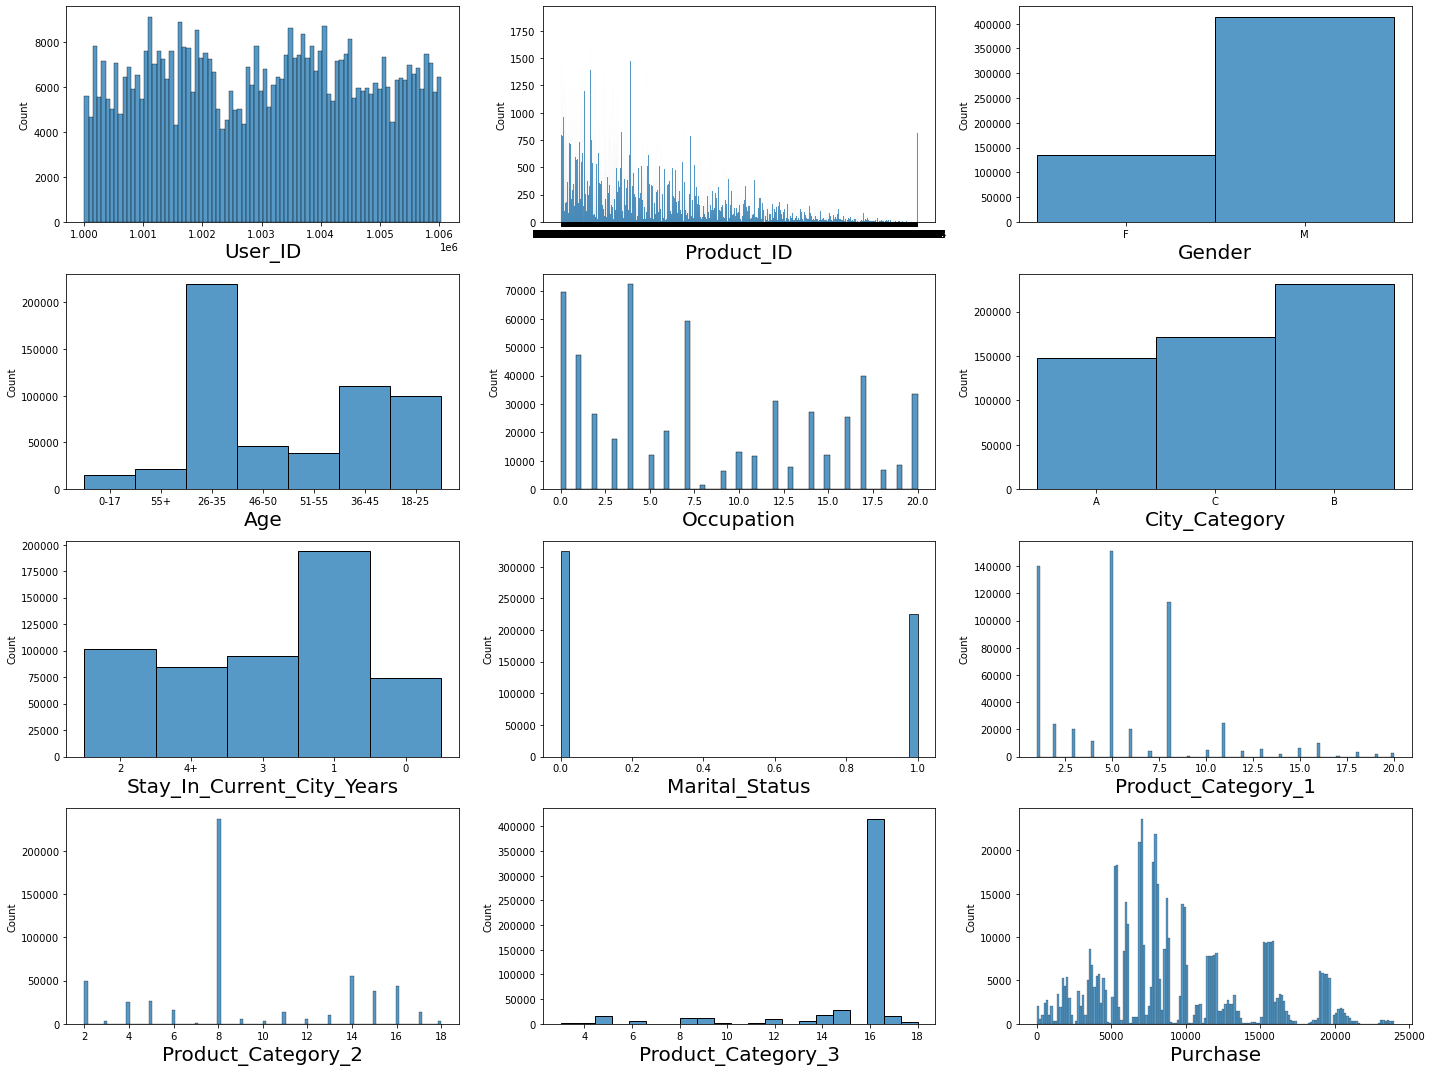

In [10]:
# Visualisation of data

plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=12:
        
        ax= plt.subplot(4,3
                        , plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize =20 )
        
    plotnumber+=1
    
plt.tight_layout()


In [34]:
#Male customers are higher in nos. over 40K as compared to female customers.
#Age group 26-35 higher nos. of customers, followed by 36-40 yeras & then 18-25 years.
#Mostly B category cities customers are more in nos. followed by C category & then A category.
#Peoples who are living since one year are higher in nos. followed by 2 years , 3 yeras , 4+ years & less than one year.
#Unmarried customers are hgher in nos. as comapred to married customers.#
#Product category 1: 5, 8 sales are higher then other categories.
#Product category 2: 8 sales are higher followed by item 14,16 & 2 sales are higher. Remaining sales are lower then other.
#Product category 3: Item 16 sales are higher this may be due to we have filled the null values with mode method.


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

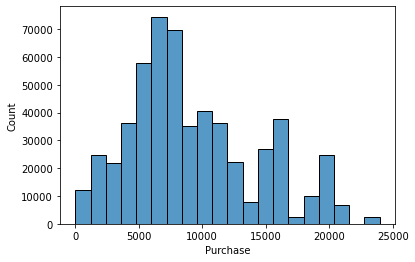

In [33]:
#Visualising the Purchase columns to find more about the purchasing details 

sns.histplot(df["Purchase"], bins=20)

In [34]:
#Customers are purchasing between 5K to 7K more times.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

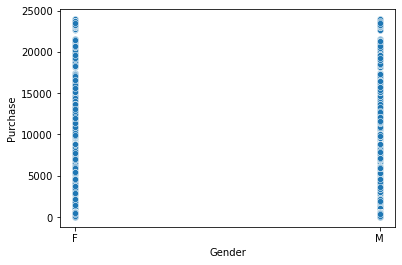

In [43]:
sns.scatterplot(x=df["Gender"], y=df["Purchase"])

In [35]:
#Generally male customers are higher on nos. but looking at purchase details both are purchasing the same amount.

<AxesSubplot:xlabel='Age', ylabel='count'>

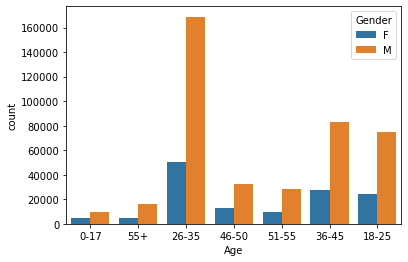

In [44]:
sns.countplot(df["Age"], hue=df["Gender"])

In [67]:
#In all category male cutomers are higher in nos. but age group 26-35 highest nos. of customers are seen followed by 36-45 & 18-25 years.
#Very less customers in the age group below 17 & above 55+years.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

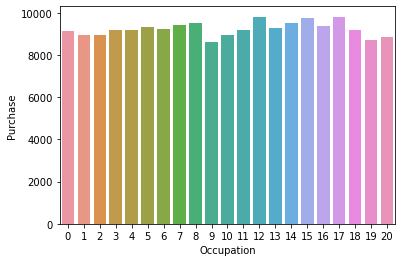

In [6]:
sns.barplot(x=df["Occupation"],y= df["Purchase"], ci=None)

In [63]:
#Correlation is showing with occupation Vs Purchases. All occupation peoples are purchasing almost equal.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

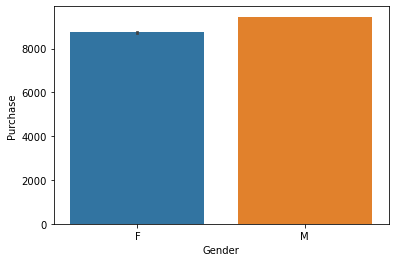

In [64]:
sns.barplot(x=df["Gender"], y=df["Purchase"])

In [65]:
#Male cutomers are higher than the femal customers. Also male customers are purchasing slitely more than the female customers.

In [57]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

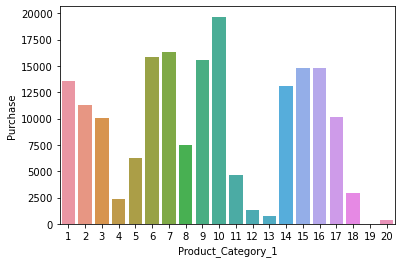

In [52]:
sns.barplot(x=df["Product_Category_1"], y=df["Purchase"], ci=None)

In [36]:
#Purchase category 1 : Item 10 are having highest sales followed by 7,6,9, 15,1 & 14.
#Followeing items are having very less sales 19, 20, 13, 12 & 4 are having very less sales.

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

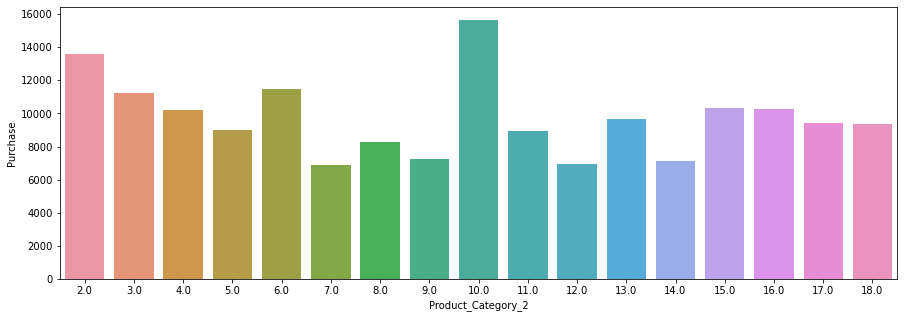

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["Product_Category_2"], y=df["Purchase"], ci=None)

In [37]:
#Prosuct category 2: Item no 10 having very high sales.

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

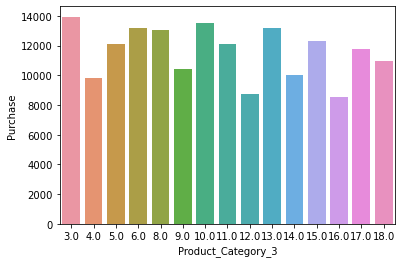

In [54]:
sns.barplot(x=df["Product_Category_3"], y=df["Purchase"], ci=None)

In [75]:
#Except 4,12 & 13 all remaining items in product category 3 are having above 10K purchasing amount.
#Item no. 3 having 14K purchasing amount.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

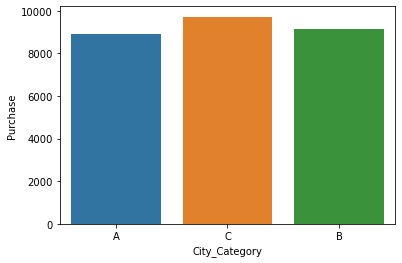

In [80]:

sns.barplot(x=df["City_Category"], y=df["Purchase"], ci=None)

In [81]:
#As we know in univariate analysis, city category B more peopples are pruchasing but as we look amount wise City category C are purchasing higher amount other than the remaining two cities.

<Figure size 432x288 with 0 Axes>

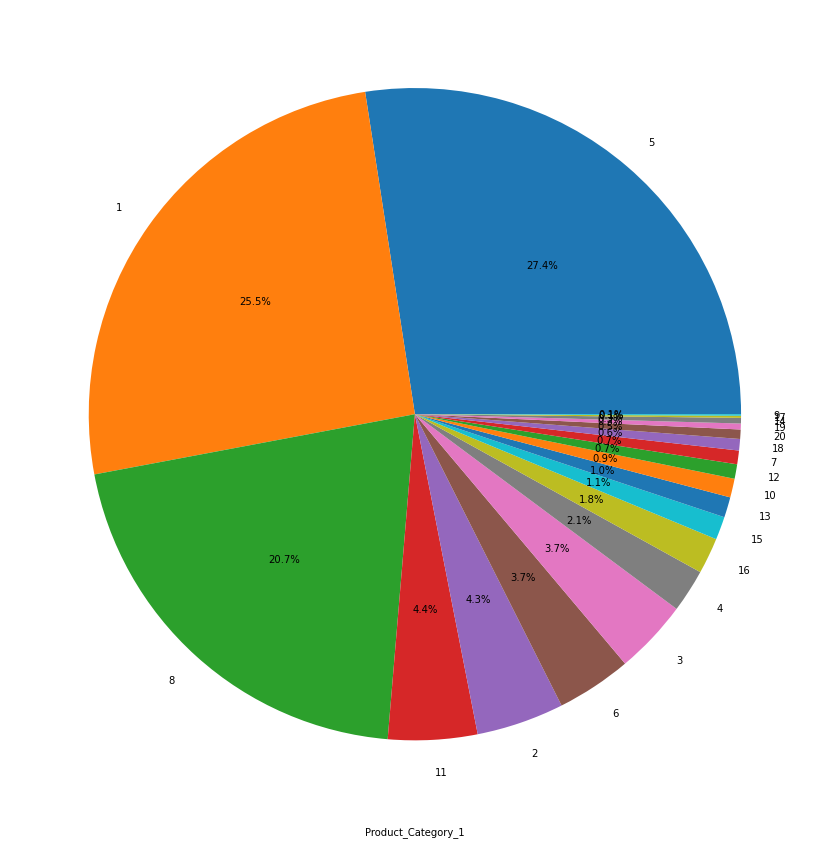

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(15,15))
df["Product_Category_1"].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel("Product_Category_1")
plt.ylabel("")
plt.figure()

In [38]:
#In product category 1 : Item no. 5 having : 27.4% sales, item 1 having 25.5%, item 8 having 20.7% sales.
#Item No. 11, 2,6,3,4 having 4.4%,4.3%, 3.7%, 3.7% & 2.1% sales.
#Remaining item are having very less sales less than 2 %.

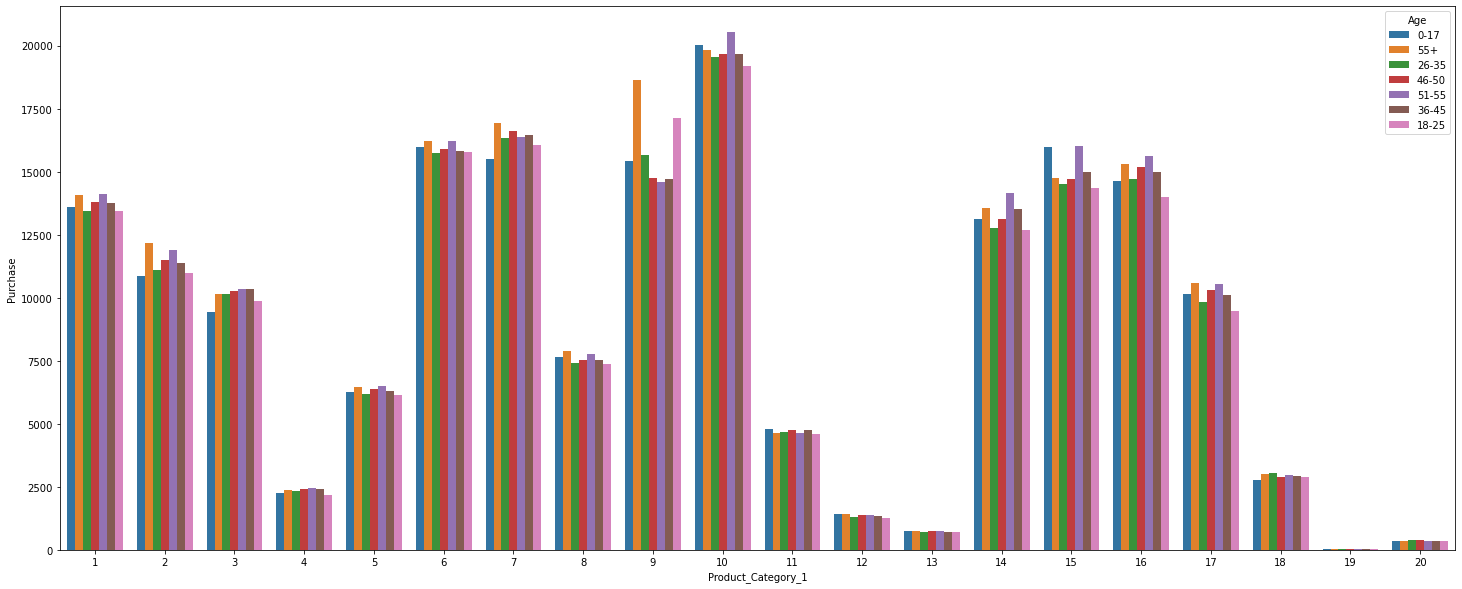

In [7]:
#Visualising the age group purchasing details along with product category
plt.figure(figsize=(25,10))
sns.barplot(x=df["Product_Category_1"], y=df["Purchase"], hue=df["Age"], ci=None)

plt.show()

In [55]:
#Product Category 1 : Item no. 10 almost all customers are purchasing in higher nos., followed by item no. 9, 7,6 15 & 16.
#One thing is observed that item no. 9 are highely purchased by the age group 55+.
#Item no. 19 are not so much purchase by any customers followed by item no. 20, 13, 12, 4 & 18. They are evry less nos. of purchasing details.

<Figure size 432x288 with 0 Axes>

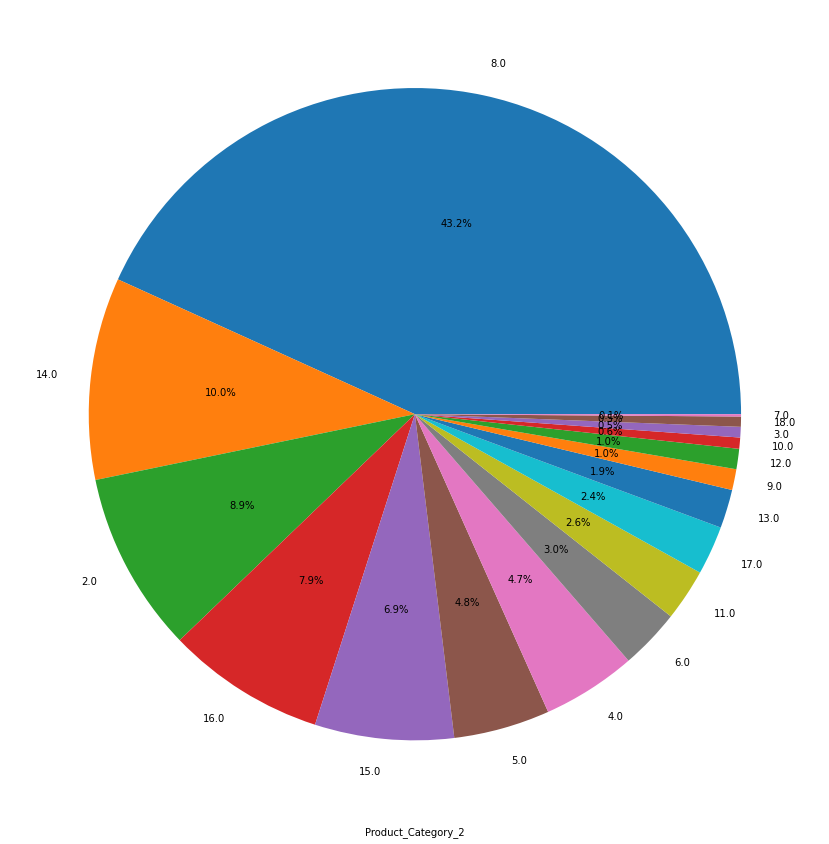

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(15,15))
df["Product_Category_2"].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel("Product_Category_2")
plt.ylabel("")
plt.figure()

In [ ]:
#In product category 2:- Item no. 8 having 43.2% sales, item 14: 12% sales, item 2: 8.9%,  item 16: 7.9%, item 15: 6.9%.
#Item 5: 4.8 % sales, item 4: 4.7 %, item, item 6: 3%, item 11: 2.6%, item 17: 2.4 % sales, item 13: 1.9% sales.
#Remianing items 9,12,10,3,18 & 7 are very less sales.

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

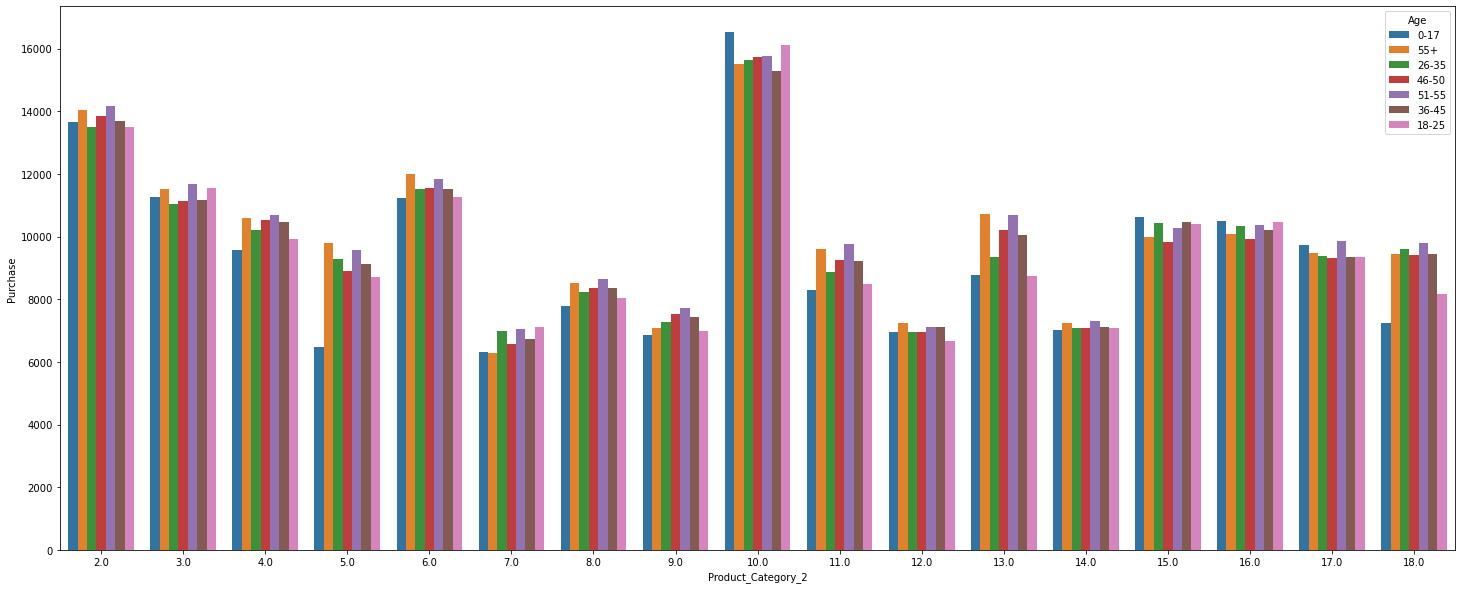

In [9]:
#Visualising the age group purchasing details along with product category
plt.figure(figsize=(25,10))
sns.barplot(x=df["Product_Category_2"], y=df["Purchase"], hue=df['Age'], ci=None)

In [ ]:
#In product category 2: Item no. 10 is having having highest purchase amount data available. In this item age group 0-17 has purchased item no. 10 more with w.r. to other age group.
#Followed by item no. 2 , 6 & remainng items.

<Figure size 432x288 with 0 Axes>

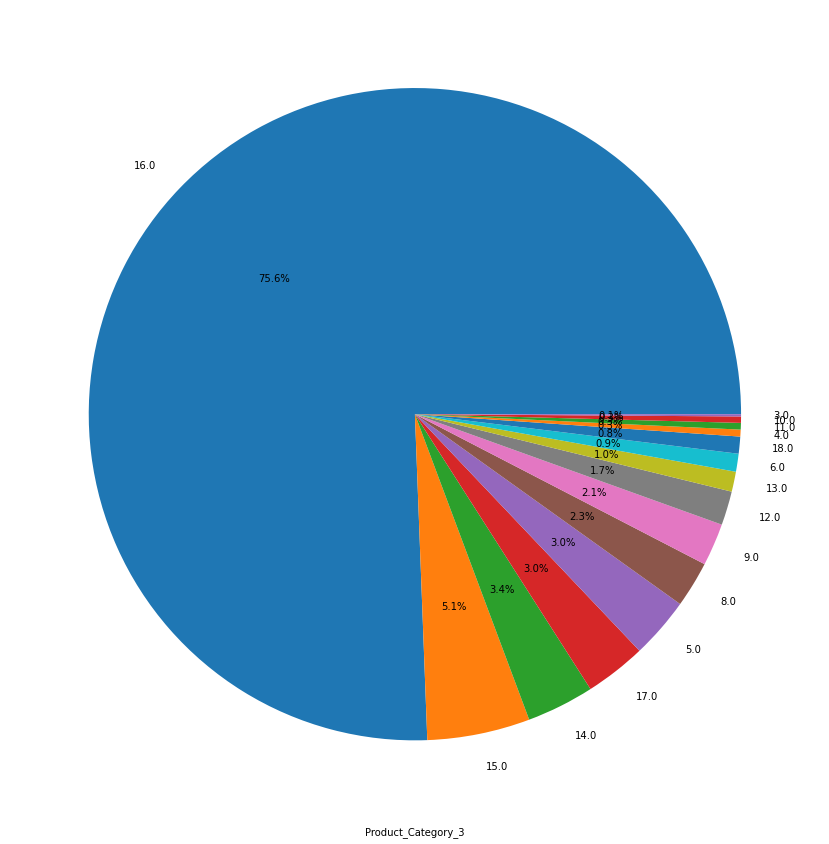

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(15,15))
df["Product_Category_3"].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel("Product_Category_3")
plt.ylabel("")
plt.figure()

In [ ]:
#Product category 3: Item 16 are having large sales 76% this may bbe due to we have filled nan with mode method.
#item 15 having 5.1% sales, item 14: 3.4%, item 17: 3%, item 5: 3%, item 8: 2.3% , item 9: 2.1% sales.
#All remaining itme sales are lower than 2%.

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

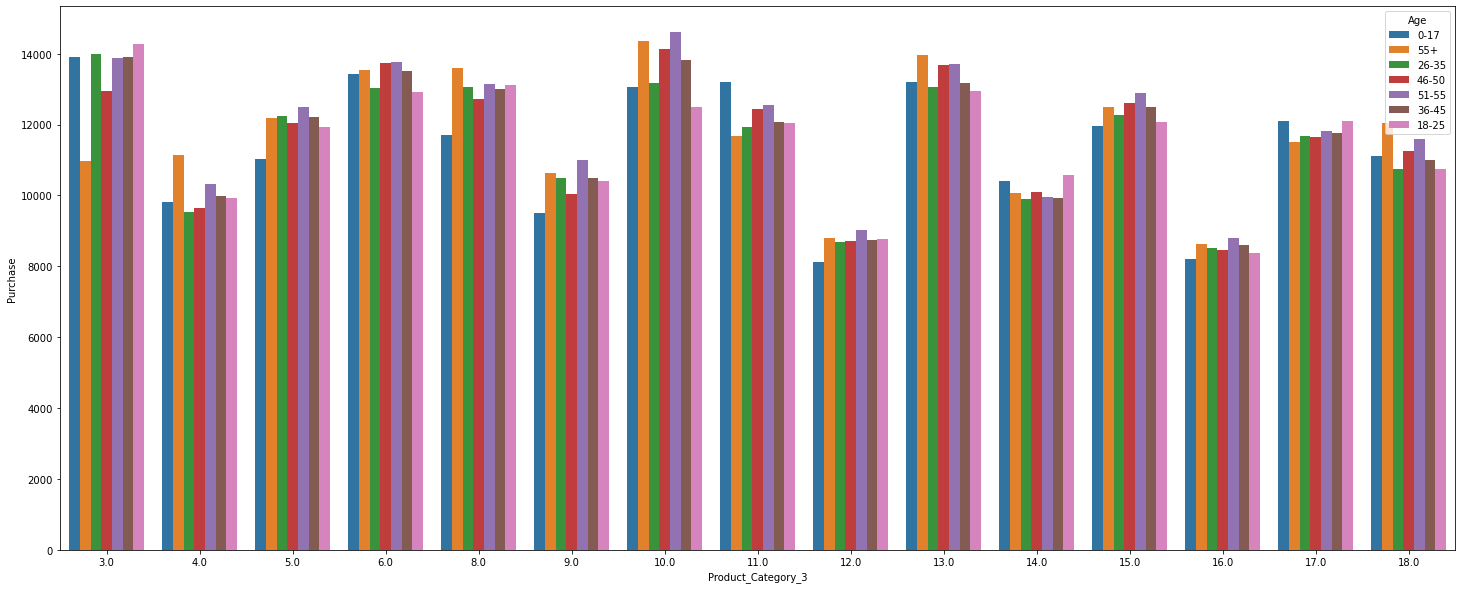

In [29]:
#Visualising the age group purchasing details along with product category
plt.figure(figsize=(25,10))
sns.barplot(x=df["Product_Category_3"], y=df["Purchase"], hue=df['Age'], ci=None)

In [ ]:
#Likewise above two categries in that category also item no. 10 purchased amount is more. followed by item no. 3 , 6, 13 & remaining.

In [63]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

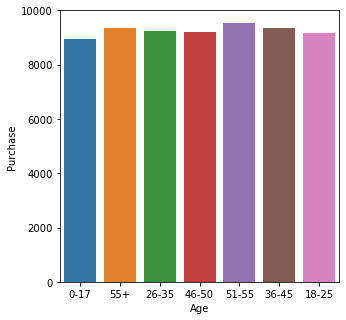

In [25]:
plt.figure(figsize=(5,5
                   ))
sns.barplot(y=df.Purchase, x=df.Age, ci=None)

<AxesSubplot:>

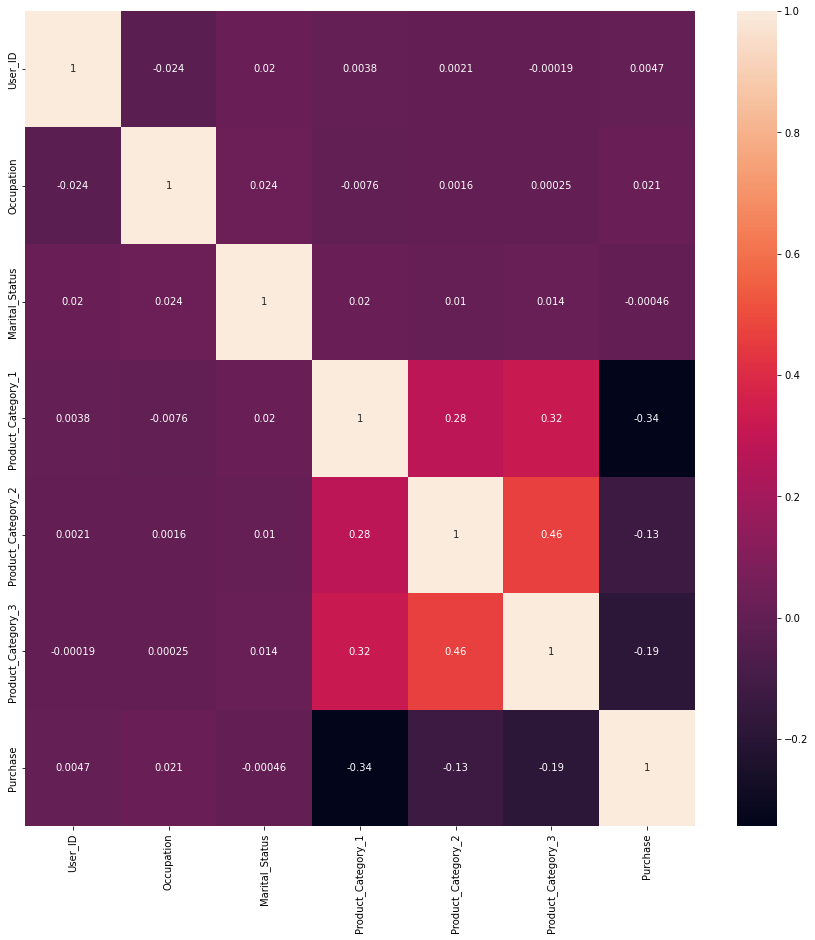

In [44]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), annot=True)

In [45]:
#From above it is obseved that product category 2 & 3 are having highest colinearity 46%.